<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [29]:
! pip install --quiet vietocr

# Inference

In [30]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [31]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [32]:
config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [33]:
detector = Predictor(config)

e:\project\vietocr\vietocr\tool\predictor.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights, map_location=torch.device(device)))


In [34]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [35]:
! ls sample | shuf |head -n 5

'ls' is not recognized as an internal or external command,
operable program or batch file.


Kết quả nhận diện: mì.


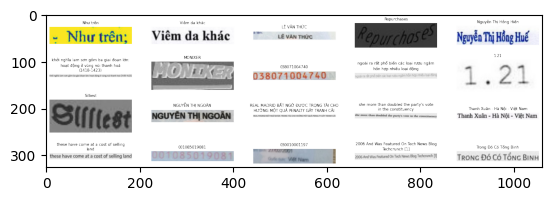

In [36]:
img = './image/sample.png'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
print("Kết quả nhận diện:", s)

# Download sample dataset

In [37]:
! wget https://vocr.vn/data/vietocr/data_line.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
! unzip -qq -o ./data_line.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [39]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [40]:
config = Cfg.load_config_from_name('vgg_transformer')

In [41]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataloader']['num_workers'] = 0
config['dataloader']['pin_memory'] = True
config['dataloader']['persistent_workers'] = False
config['trainer']['fp16'] = True
config['trainer']['batch_size'] = 16
config['trainer']['scheduler'] = 'cosine'
config['trainer']['lr'] = 5e-4
config['transformer']['max_seq_length'] = 1024
config['dataset']['image_height'] = 32  # Hoặc 32
config['dataset']['image_max_width'] = 256 # Hoặc 128
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [42]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 16,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000,
  'fp16': True,
  'scheduler': 'cosine',
  'lr': 0.0005},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annot

You should train model from our pretrained 

In [43]:
trainer = Trainer(config, pretrained=True)

Model weight C:\Users\ADMIN\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 123715.66it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 110701.18it/s]


Save model configuration for inference, load_config_from_file

In [44]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

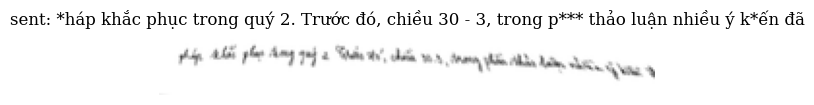

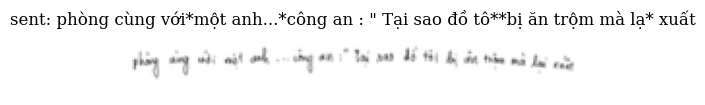

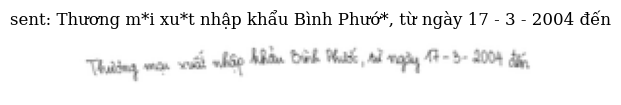

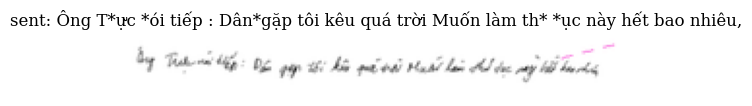

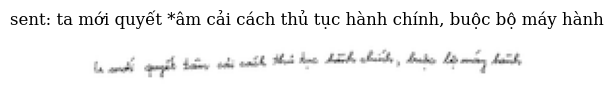

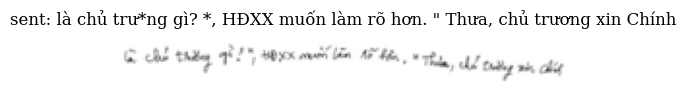

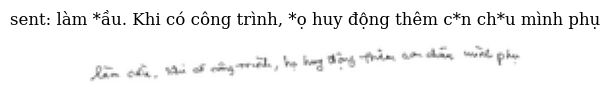

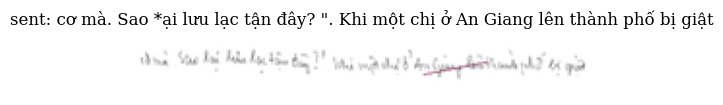

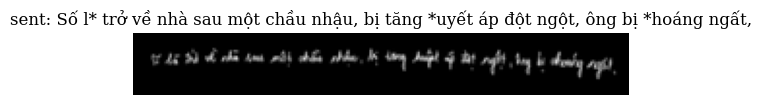

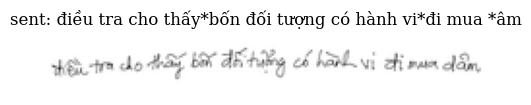

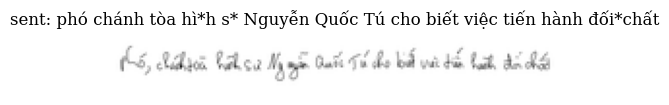

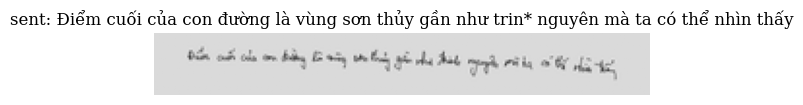

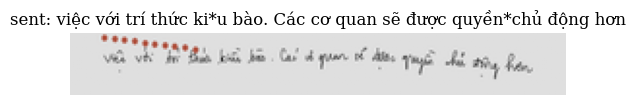

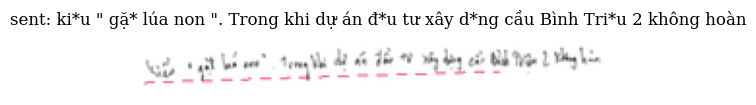

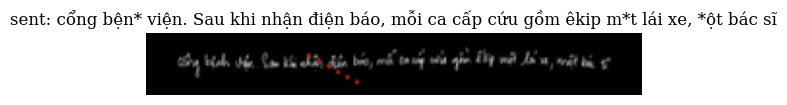

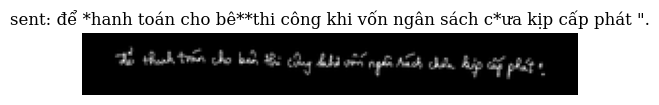

In [45]:
trainer.visualize_dataset()

Train now

In [46]:
trainer.train()

iter: 000200 - train loss: 1.812 - lr: 1.91e-05 - load time: 7.05 - gpu time: 87.12
iter: 000400 - train loss: 1.572 - lr: 3.95e-05 - load time: 5.96 - gpu time: 87.05
iter: 000600 - train loss: 1.424 - lr: 7.14e-05 - load time: 5.46 - gpu time: 86.65
iter: 000800 - train loss: 1.353 - lr: 1.12e-04 - load time: 5.27 - gpu time: 86.35
iter: 001000 - train loss: 1.268 - lr: 1.56e-04 - load time: 5.44 - gpu time: 86.82
iter: 001200 - train loss: 1.229 - lr: 2.01e-04 - load time: 5.36 - gpu time: 86.40
iter: 001400 - train loss: 1.201 - lr: 2.41e-04 - load time: 5.26 - gpu time: 86.75
iter: 001600 - train loss: 1.167 - lr: 2.73e-04 - load time: 5.29 - gpu time: 86.23
iter: 001800 - train loss: 1.146 - lr: 2.93e-04 - load time: 5.44 - gpu time: 86.01
iter: 002000 - train loss: 1.126 - lr: 3.00e-04 - load time: 5.36 - gpu time: 87.15
iter: 002200 - train loss: 1.095 - lr: 3.00e-04 - load time: 5.50 - gpu time: 86.15
iter: 002400 - train loss: 1.089 - lr: 3.00e-04 - load time: 5.36 - gpu time

Visualize prediction from our trained model


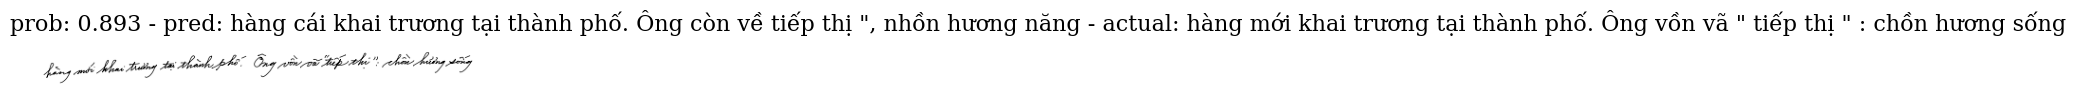

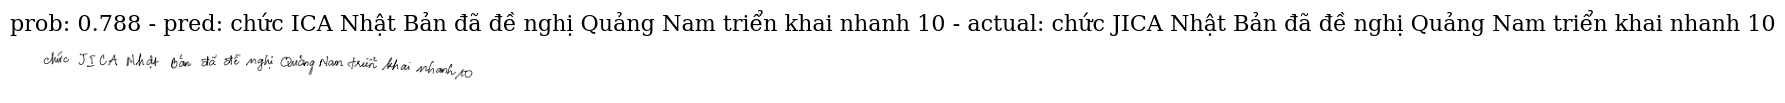

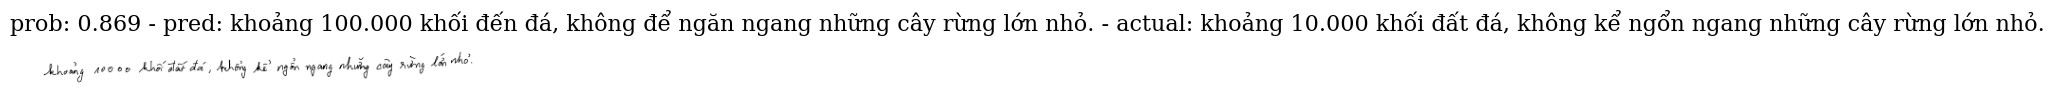

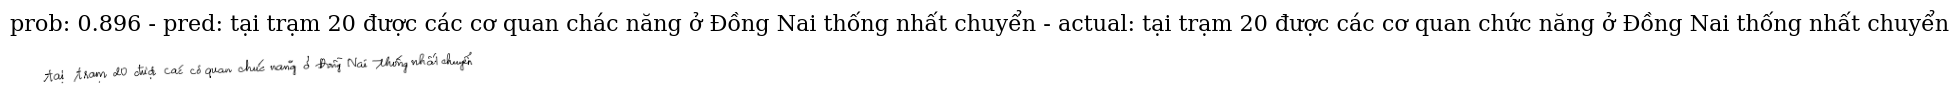

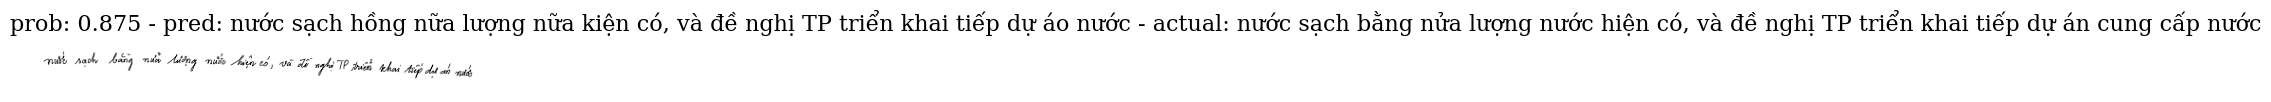

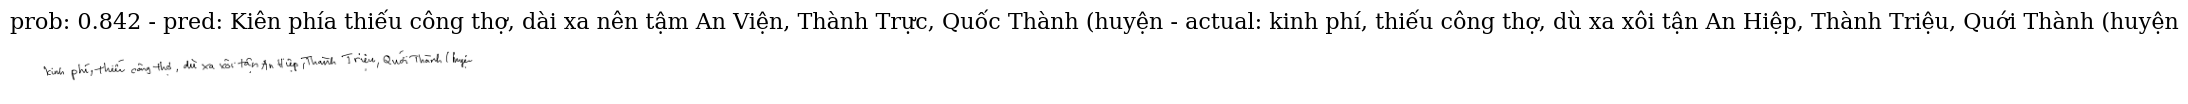

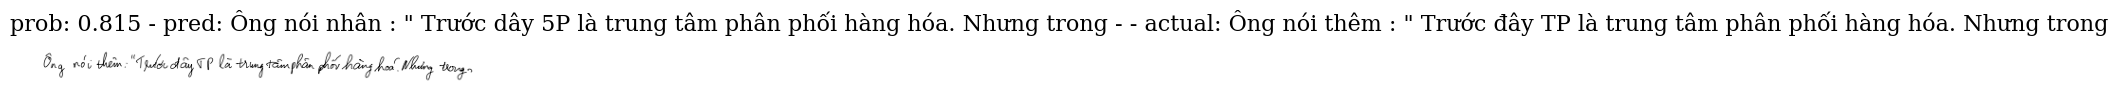

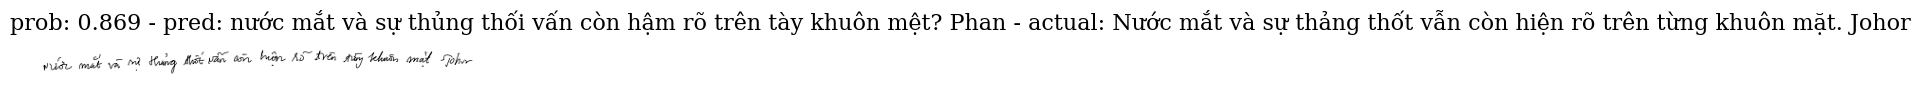

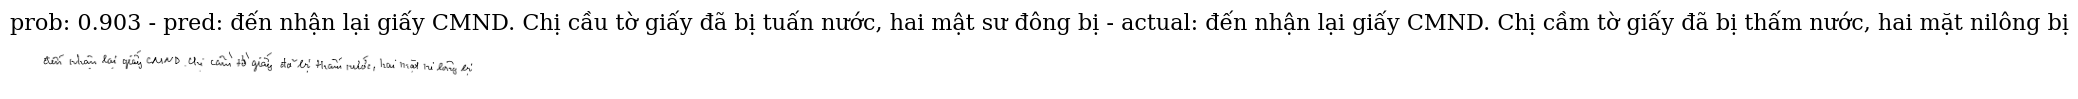

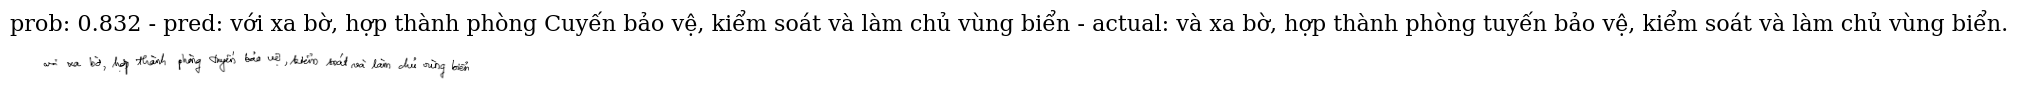

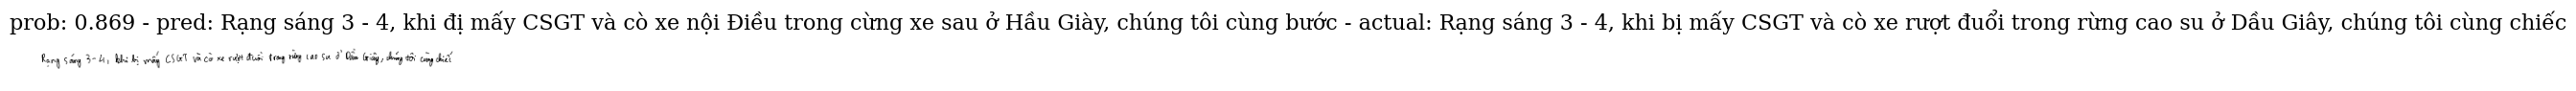

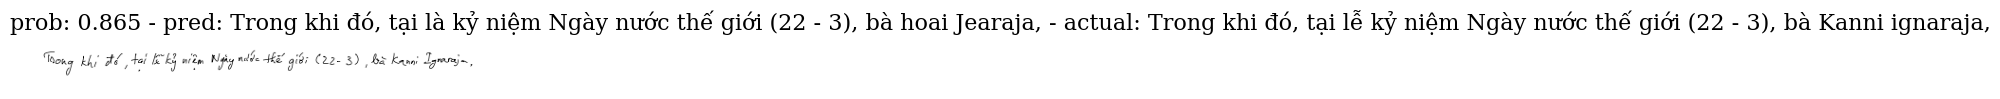

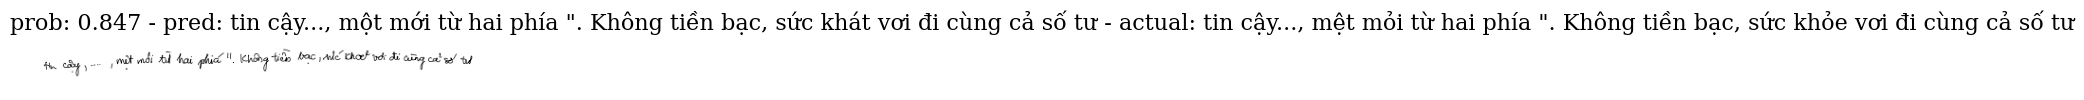

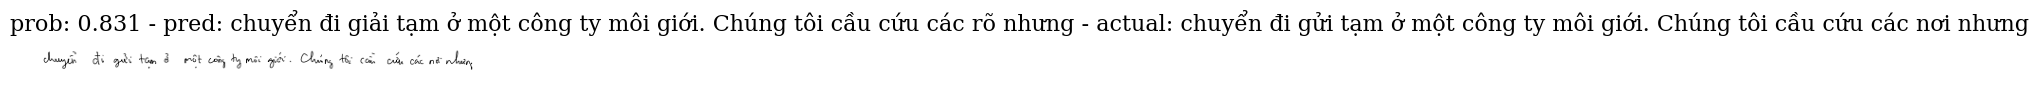

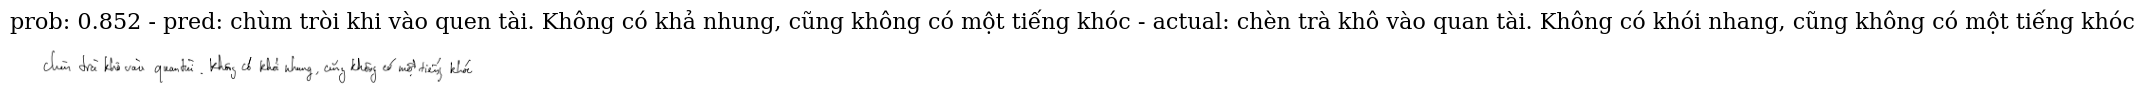

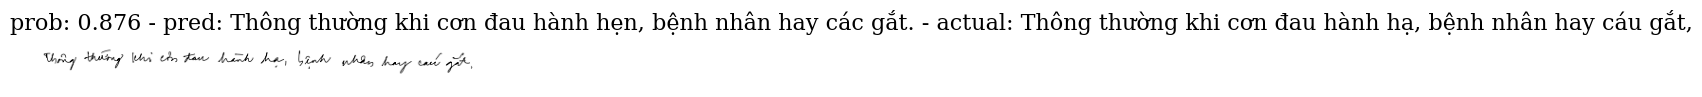

In [47]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [48]:
trainer.precision()

(0.07230392156862746, np.float32(0.59726256))